## Regression model

***

### Markdown Guides

> This is a blockquote.

Some of these words *are emphasized*.

Use two asterisks for **strong emphasis**.

*   Another item in the list.

This is an [example link](http://example.com/).

$x = x + y$

[text to appear as link](#linkhandle)

Images inline
![image](https://imgbbb.com/images/2019/12/18/Screenshot-2019-12-18-at-12.55.36-PM.png)

## Project Description

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Data sources used

## Business Task

this time fit a linear regression model between walking distance (MWT1best) and age (AGE).  Remember that walking distance is the outcome variable and age is the predictor variable

## Metrics

## Assumptions

## Data Tasks

- 
- 
- 
- 
- 
-

## Summary

## Recommendation for Action

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [3]:
df = pd.read_csv("COPD_student_dataset.csv")

In [4]:
df

,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,58,77,60.00,SEVERE,120.00,120.00,120.00,1.21,36.00,2.40,98,25,8.00,69.55,4,3,1,2,1,0,0,1,0
1,57,79,50.00,MODERATE,165.00,176.00,176.00,1.09,56.00,1.64,65,12,21.00,44.24,4,2,0,2,1,0,0,1,1
2,62,80,11.00,MODERATE,201.00,180.00,201.00,1.52,68.00,2.30,86,22,18.00,44.09,4,2,0,2,1,0,0,1,0
3,145,56,60.00,VERY SEVERE,210.00,210.00,210.00,0.47,14.00,1.14,27,28,26.00,62.04,1,4,1,2,0,0,1,1,0
4,136,65,68.00,SEVERE,204.00,210.00,210.00,1.07,42.00,2.91,98,32,18.00,75.56,1,3,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,10,68,25.00,MILD,511.00,575.00,575.00,2.70,98.00,3.87,108,20,7.00,35.84,2,1,1,2,0,1,0,0,0
97,43,75,40.00,MILD,576.00,577.00,577.00,2.90,93.00,4.72,114,9,22.00,15.05,3,1,1,2,0,1,0,0,1
98,74,68,30.00,MODERATE,468.00,582.00,582.00,1.65,67.00,2.80,88,4,1.00,19.70,2,2,0,2,0,0,1,0,0
99,108,54,30.00,SEVERE,688.00,699.00,699.00,1.72,44.00,4.07,82,10,10.00,20.55,1,3,1,2,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            101 non-null    int64  
 1   AGE           101 non-null    int64  
 2   PackHistory   101 non-null    float64
 3   COPDSEVERITY  101 non-null    object 
 4   MWT1          99 non-null     float64
 5   MWT2          100 non-null    float64
 6   MWT1Best      100 non-null    float64
 7   FEV1          101 non-null    float64
 8   FEV1PRED      101 non-null    float64
 9   FVC           101 non-null    float64
 10  FVCPRED       101 non-null    int64  
 11  CAT           101 non-null    int64  
 12  HAD           101 non-null    float64
 13  SGRQ          101 non-null    float64
 14  AGEquartiles  101 non-null    int64  
 15  copd          101 non-null    int64  
 16  gender        101 non-null    int64  
 17  smoking       101 non-null    int64  
 18  Diabetes      101 non-null    

In [6]:
df.describe()

,ID,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.00,101.00,101.00,99.00,100.00,100.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00,101.00
mean,91.41,70.10,39.70,385.86,390.28,399.11,1.60,58.53,2.95,86.44,19.34,11.18,40.19,2.48,2.20,0.64,1.84,0.21,0.19,0.12,0.20,0.09
std,51.52,7.90,24.56,104.74,107.75,106.55,0.67,22.29,0.98,21.74,18.67,8.59,18.24,1.11,0.88,0.48,0.37,0.41,0.39,0.33,0.40,0.29
min,1.00,44.00,1.00,120.00,120.00,120.00,0.45,3.29,1.14,27.00,3.00,0.00,2.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,49.00,65.00,20.00,300.00,303.75,303.75,1.10,42.00,2.27,71.00,12.00,6.00,28.41,1.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00
50%,87.00,71.00,36.00,419.00,399.00,420.00,1.60,60.00,2.77,84.00,18.00,10.00,38.21,3.00,2.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00
75%,143.00,75.00,54.00,460.50,459.00,465.25,1.96,75.00,3.63,103.00,24.00,15.00,55.23,3.00,3.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00
max,169.00,88.00,109.00,688.00,699.00,699.00,3.18,102.00,5.37,132.00,188.00,56.20,77.44,4.00,4.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00


In [7]:
df.columns

Index(['ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1', 'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD', 'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes', 'muscular', 'hypertension', 'AtrialFib', 'IHD'], dtype='object')

### Drop unwanted features

In [8]:
df = df[["AGE","MWT1Best"]]

In [9]:
df

,AGE,MWT1Best
0,77,120.00
1,79,176.00
2,80,201.00
3,56,210.00
4,65,210.00
...,...,...
96,68,575.00
97,75,577.00
98,68,582.00
99,54,699.00


### Pandas-Profiling Reports

In [ ]:
profile = ProfileReport(df=df, title='Name of Report', minimal=True)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file("your_report.html")

## Data Visualization

### Univariate Data Exploration

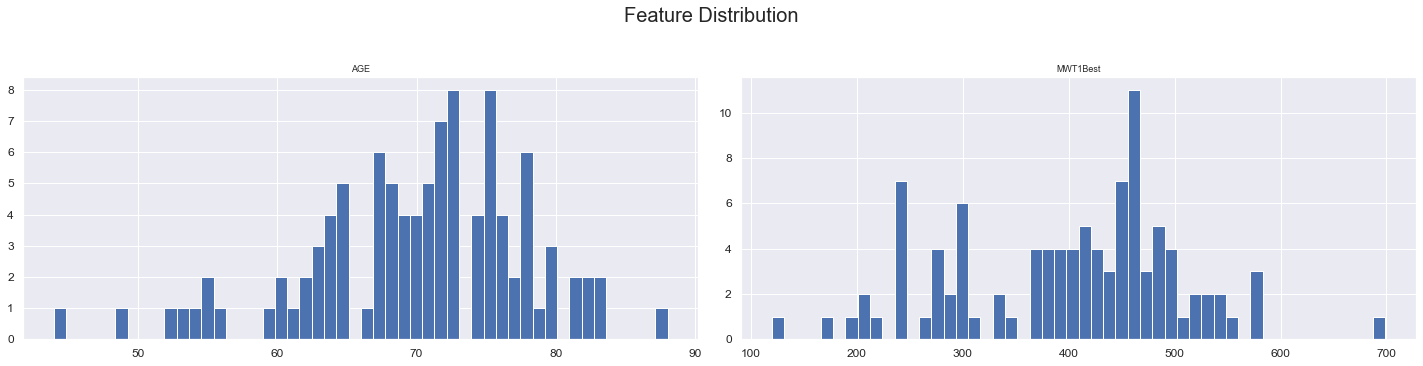

In [11]:
df.hist(bins=50, figsize=(20,5))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

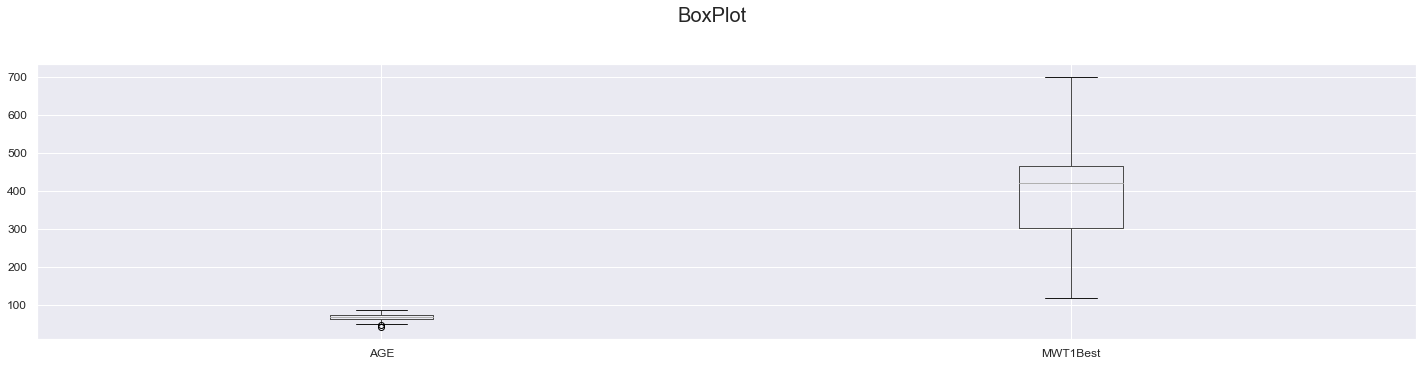

In [12]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

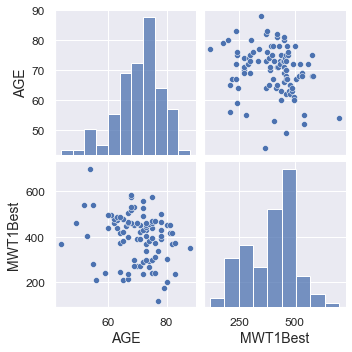

In [14]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df)
plt.show()

### Correlation

In [15]:
df.corr()

,AGE,MWT1Best
AGE,1.00,-0.23
MWT1Best,-0.23,1.00


## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


### Levene's Test

In [ ]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')

## T-Test

### One Sample T-Test

In [ ]:
t, p = scipy.stats.ttest_1samp(a=df.dose, popmean=1.166667)

In [ ]:
print("T-test value is: ", t)
print("p-value value is: ", p)

### Two Samples T-Test

In [ ]:
t, p = scipy.stats.ttest_ind(a=df.len,b=df.dose, equal_var = True/False)

In [ ]:
print("T-test value is: ",t)
print("p-value value is: ",p)

### ANOVA

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

-   40 years and younger
-   between 40 and 57 years
-   57 years and older


State the hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


### One Way ANOVA

In [ ]:
mod = ols('len~supp', data=df).fit()

In [ ]:
aov_table = sm.stats.anova_lm(mod,typ=2)

In [ ]:
aov_table

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

### Two-way ANOVA

In [ ]:
mod1 = ols('len~supp+dose', data=df).fit()

In [ ]:
aov1 = sm.stats.anova_lm(mod1,typ=2)

In [ ]:
aov1

### Chi-square

State the hypothesis:

-   $H_0:$ The proportion of teachers who are tenured is independent of gender
-   $H_1:$ The proportion of teachers who are tenured is associated with gender

In [ ]:
#Create a Cross-tab table

cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

In [ ]:
scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
chi_square = scipy.stats.chi2_contingency(cont_table, correction = True)

In [ ]:
print(f"Chi score is", chi_square[0])

In [ ]:
print("P-value is", chi_square[1])

In [ ]:
print("Degrees of freedom is", chi_square[2])

### Correlation

State the hypothesis:

-   $H_0:$ Teaching evaluation score is not correlated with beauty score
-   $H_1:$ Teaching evaluation score is correlated with beauty score


In [ ]:
pearson_correlation = scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

In [ ]:
print("Pearson's correlation coefficient is", pearson_correlation[0])

In [ ]:
print("P-value is", pearson_correlation[1])

## Data Preprocessing

### Feature Engineering

### Equal Width Discretization

In [ ]:
df["demoscorecat"] = df["polityscore"] #Make a copy

In [ ]:
disc = EqualWidthDiscretiser(bins=4, variables=['demoscorecat'], return_object=True)

In [ ]:
disc

In [ ]:
disc.fit(df)

In [ ]:
disc.binner_dict_

In [ ]:
df2 = disc.fit_transform(df)
df2.head()

In [ ]:
df2["demoscorecat"].value_counts().plot.bar()
plt.show()

### Equal Frequency Discretizer

In [ ]:
df2["co2cat"] = df2["co2emissions"] #Make a copy

In [ ]:
disc = EqualFrequencyDiscretiser(q=5, variables=['co2cat'])

In [ ]:
disc.fit(df2)

In [ ]:
disc.binner_dict_

In [ ]:
df3 = disc.transform(df2)
df3.head()

In [ ]:
df3["co2cat"].value_counts().plot.bar()
plt.show()

### Discretisation + OrdinalEncoder

In [ ]:
### Choose which columns to be discretized first
df3["incomecat"] = df3["incomeperperson"] #Make a copy
df3["alccat"] = df3["alcconsumption"] #Make a copy

In [ ]:
df3.head()

In [ ]:
# to encode variables we need them returned as objects for feature-engine
disc = EqualFrequencyDiscretiser(q=5, variables=['incomecat','alccat'], return_object=True)

In [ ]:
df4 = disc.fit_transform(df3)
df4.head()

In [ ]:
df4["incomecat"].value_counts().plot.bar()
df4["alccat"].value_counts().plot.bar()
plt.show()

In [ ]:
# Set y = target variable, and x = independant variables (both must be objects)

In [ ]:
df5 = df4[['demoscorecat','incomecat', 'alccat']]
df5.head()

In [ ]:
df5.dtypes

In [ ]:
df5.groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
df5.groupby('alccat')['demoscorecat'].mean().plot()
plt.show()

In [ ]:
enc = OrdinalEncoder(encoding_method = 'ordered')

In [ ]:
X = df5[['incomecat', 'alccat']]

In [ ]:
y = df5['demoscorecat']

In [ ]:
enc.fit(X, y)

In [ ]:
X_transform = enc.transform(X)

In [ ]:
enc.encoder_dict_

In [ ]:
X_transform  # Transformed for monotonic relationship

In [ ]:
pd.concat([X_transform, y], axis=1)

In [ ]:
pd.concat([X_transform, y], axis=1).groupby('incomecat')['demoscorecat'].mean().plot()
plt.show()

### Discretisation with Decision Trees

In [ ]:
df4['electricat'] = df4['relectricperperson'] #Make a copy

In [ ]:
df4.head()

In [ ]:
# Let y = demoscorecat, and x = electricat, breastcancerper100th

df6 = df4[['breastcancerper100th','electricat','demoscorecat']]
df6.head()

In [ ]:
X = df6[['breastcancerper100th','electricat']]
y = df6['demoscorecat']

In [ ]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=5, scoring='accuracy', variables=['electricat'], regression=False,
                                  param_grid={'max_depth':[1,2,3], 'min_samples_leaf':[2,4,6]})

In [ ]:
treeDisc.fit(X,y)

In [ ]:
treeDisc.binner_dict_['electricat'].best_params_

In [ ]:
treeDisc.scores_dict_['electricat']

In [ ]:
X_transform = treeDisc.transform(X) #Only electricat column

In [ ]:
X_transform

In [ ]:
X_transform.electricat.unique()

In [ ]:
# monotonic relationship with target: train set

pd.concat([X_transform, y],axis=1)

### Treat Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df[''] = df[''].replace(np.nan,df.mean())

In [ ]:
#imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [ ]:
#imputer.fit(df)

In [ ]:
#df = imputer.transform(df)

In [ ]:
df.isnull().sum()

### Replacing values

In [ ]:
df.replace()

### Rounding Values

In [ ]:
###pandas.DataFrame.round
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

In [ ]:
df[df.duplicated(keep=False)] #Check duplicate values

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5, variables=[])

In [ ]:
#windsorizer.fit(df)

In [ ]:
#df2 = windsorizer.transform(df)

In [ ]:
#df2

In [ ]:
#df2.describe()

In [ ]:
#windsorizer.left_tail_caps_

In [ ]:
#windsorizer.right_tail_caps_

### Type Change

In [ ]:
df.info()

In [ ]:
df["breastcancerper100th"] = df["breastcancerper100th"].astype('int')

In [ ]:
df.info()

### One-hot encoding

In [ ]:
df.info()

In [ ]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

### Save to CSV

In [ ]:
df.to_csv("filename.csv", index=False)

## Regression Analysis

In [17]:
df.columns

Index(['AGE', 'MWT1Best'], dtype='object')

In [22]:
y = df[['MWT1Best']]
X = df[['AGE']]

In [23]:
X = sm.add_constant(X)

In [24]:
model = sm.OLS(y,X).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MWT1Best   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 06 May 2021   Prob (F-statistic):                nan
Time:                        10:12:17   Log-Likelihood:                    nan
No. Observations:                 101   AIC:                               nan
Df Residuals:                      99   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
AGE               nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         633.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
prediction = model.predict(x)

NameError: name 'x' is not defined

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

#### Python code done by Dennis Lam